In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Путь к папке с атаками
base_path = "../attacks/"

combined_path = "./combined_csvs/"
os.makedirs(combined_path, exist_ok=True)

attack_folders = os.listdir(base_path)
attack_labels = {attack: idx + 1 for idx, attack in enumerate(attack_folders)}
attack_labels

{'brute-http': 1,
 'brute-ftp': 2,
 'inf-usb': 3,
 'xss': 4,
 'brute-ssh': 5,
 'inf-dropbox': 6,
 'sql-inj': 7,
 'botnet-ares': 8}

Анализ взаимной информациии

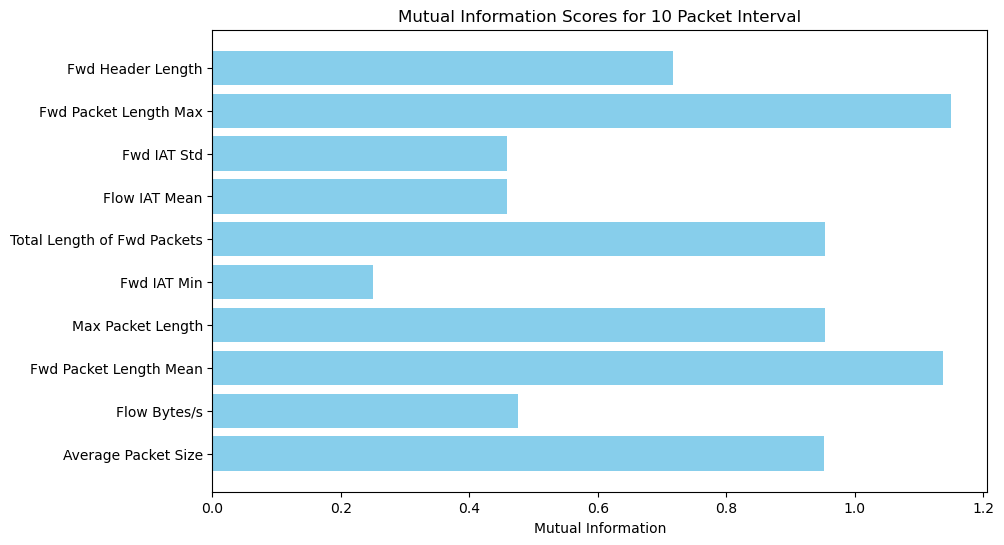

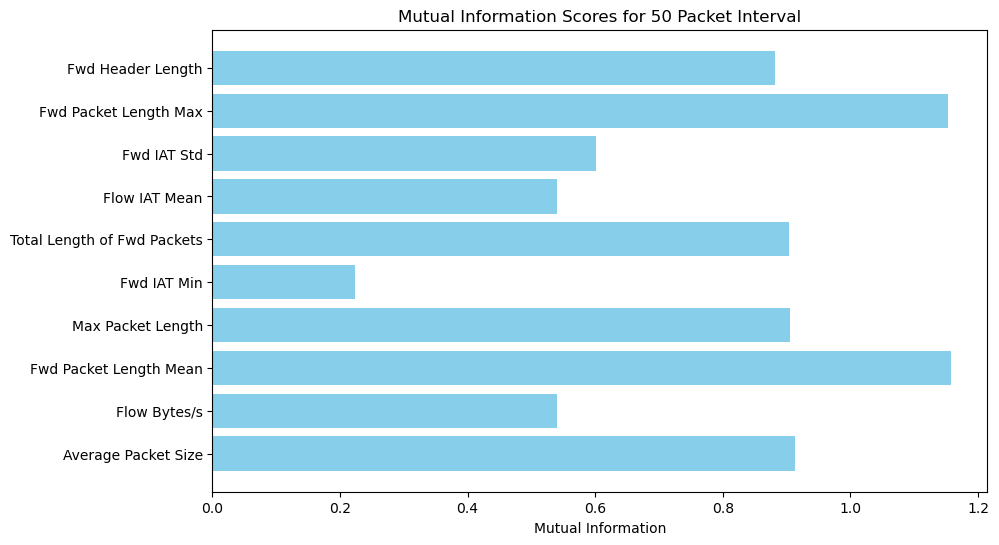

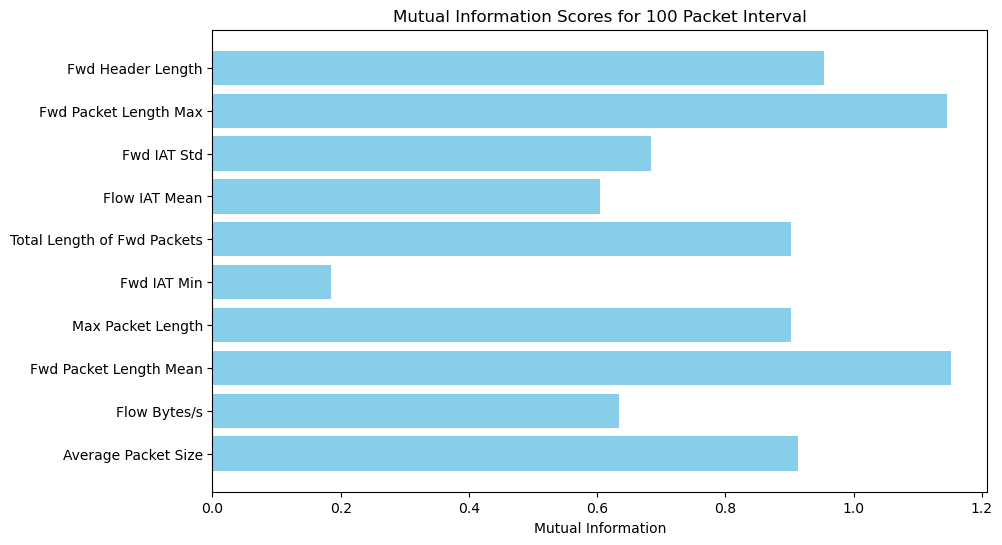

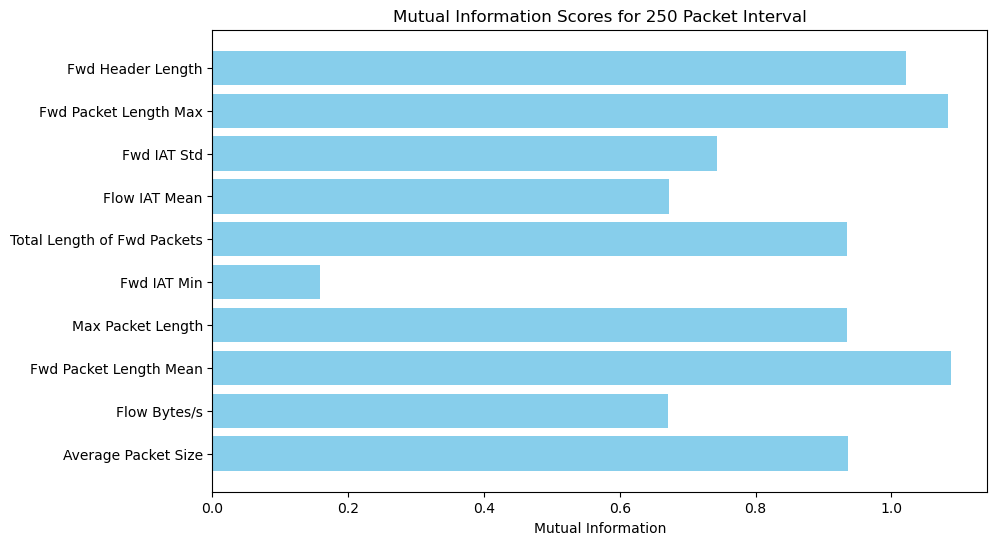

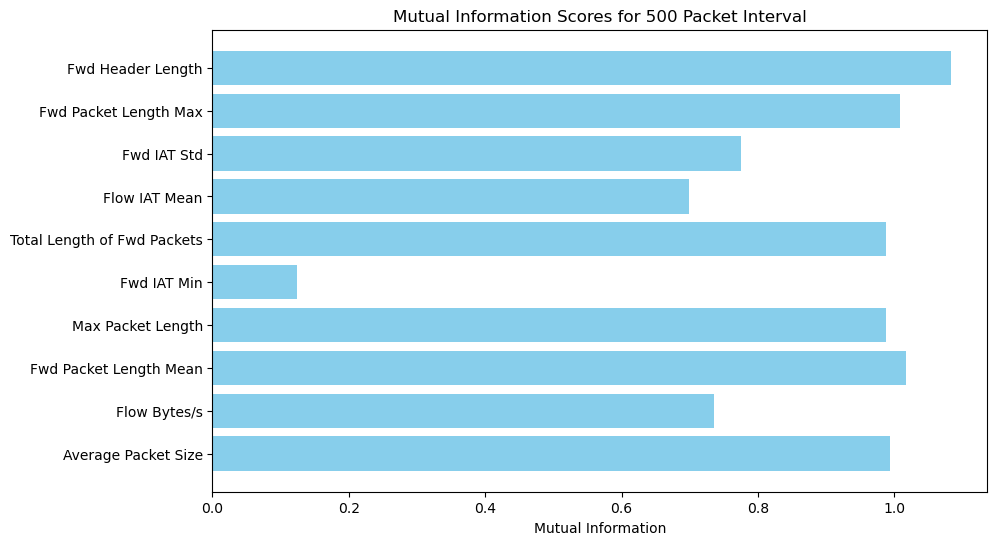

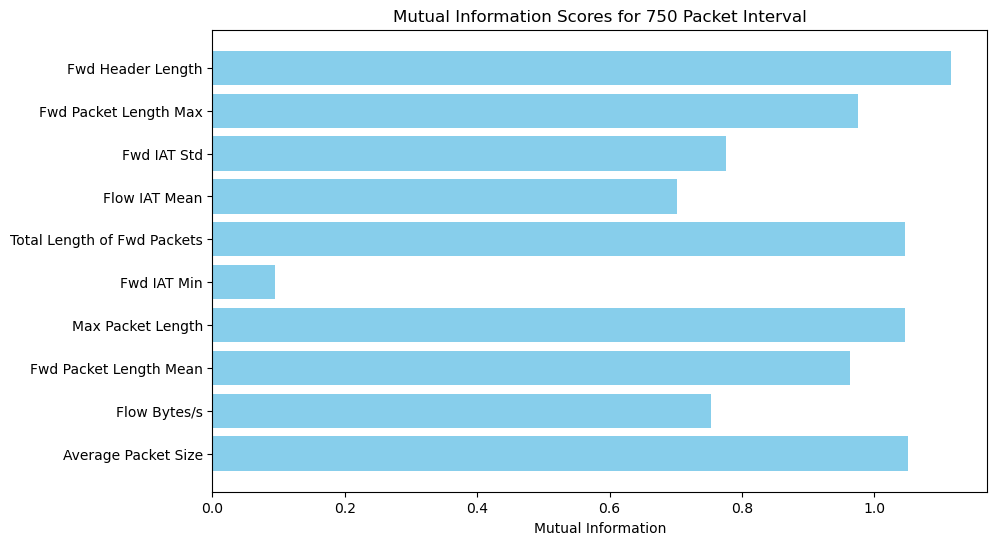

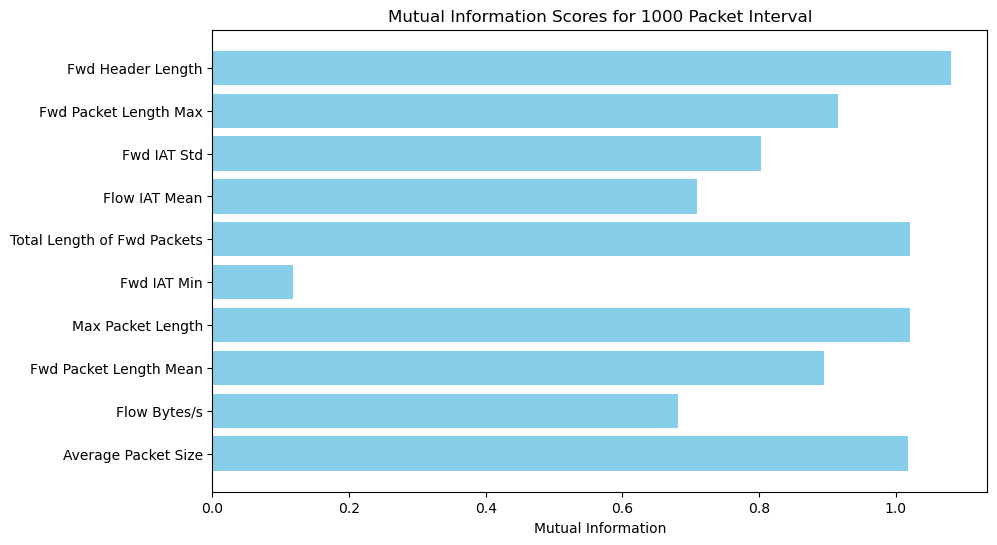

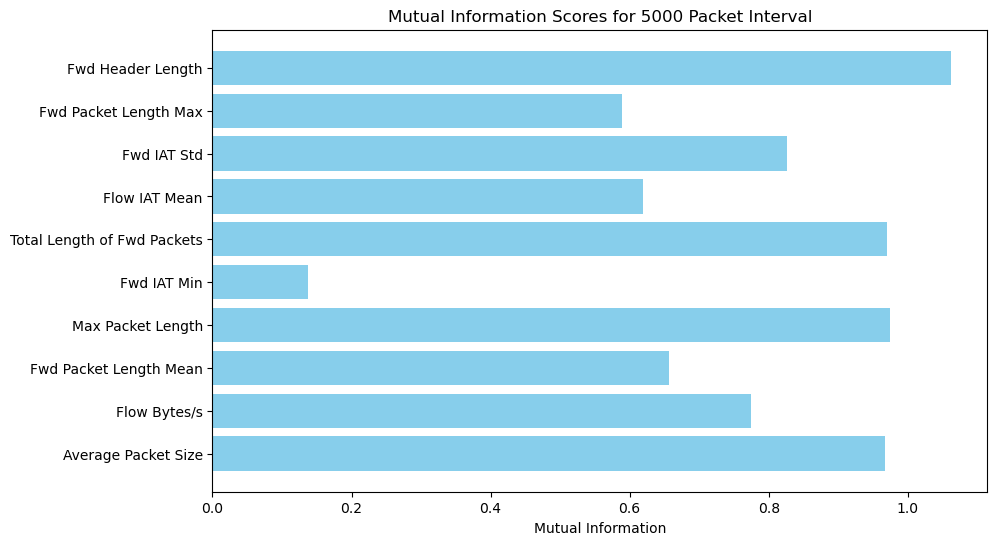

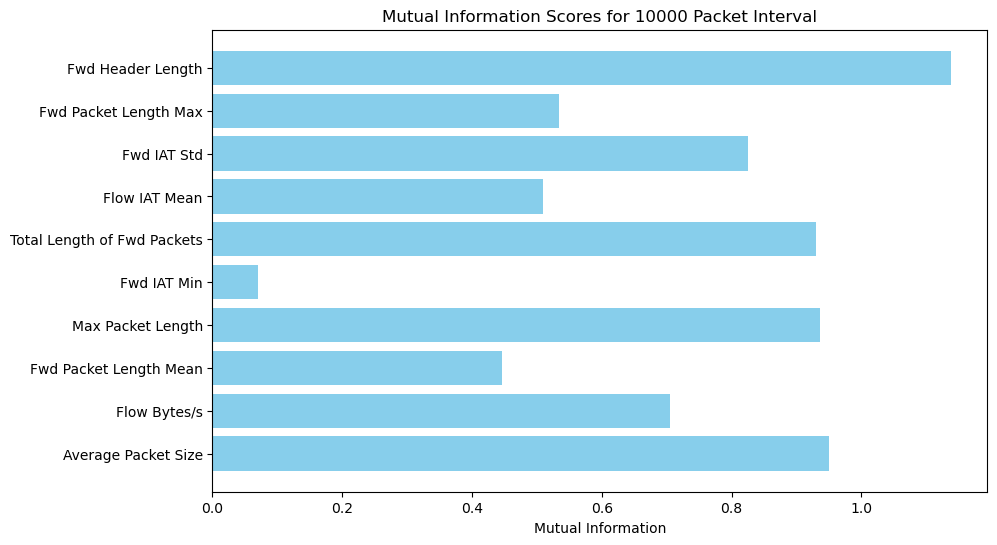

In [ ]:
# Путь к папке с объединенными файлами
combined_path = "./combined_csvs/"

# Собираем данные по взаимной информации и пакетной выборке
mutual_info_data = []

for combined_file in os.listdir(combined_path):
    if combined_file.endswith(".csv"):
        # Чтение данных
        df = pd.read_csv(os.path.join(combined_path, combined_file))

        # Признаки (X) и целевая переменная (y)
        X = df.drop(columns=["Label"])
        y = df["Label"]

        # Расчет взаимной информации
        mutual_info = mutual_info_classif(X, y, random_state=0)

        # Извлечение размера пакетной выборки из названия файла
        packet_size = int(re.search(r"(\d+)_packets", combined_file).group(1))

        # Сохранение данных
        mutual_info_data.append((packet_size, X.columns, mutual_info))

# Сортировка по длине выборки пакетов
mutual_info_data.sort(key=lambda x: x[0])

# Визуализация взаимной информации
for packet_size, feature_names, mutual_info in mutual_info_data:
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, mutual_info, color="skyblue")
    plt.xlabel("Mutual Information")
    plt.title(f"Mutual Information Scores for {packet_size} Packet Interval")
    plt.show()